## MACHINE LEARNING - CLASSIFICATION 

# Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. The automated response will predict the loan status of the applicant

# The Process

The data set was loaded into the work environment, cleaned by removing unwanted columns and converting all 'string' values in our data set in to numerical values that our model can work with.

The independent variables (X) and our dependent varible (y) was identified, and the model was trained with 80% of our data set and tested the reminder.

We ran the following classification algorithm on our data set

1. KNN (Test set accuracy = 0.7642276422764228)
2. Logistic Regression (Test set accuracy = 0.7886178861788617)
3. SVM (Test set accuracy = 0.7886178861788617)
4. Decision Tree (Test set accuracy = 0.7804878048780488)

# Evaluation

The reult of the classifier was evaluated aand reported using 

1. LogLoss 
2. F1 Score 
3. Jacard Index

The below codes and output gives a programmatic description of the above process.

In [52]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import sklearn
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from sklearn import preprocessing, model_selection, neighbors, metrics, svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [53]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_70859b7287384475b6dbf82710422a84 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='h3WvhjWQE9joxdZv_8folCPM8C-SmwHjXkKlmUL-0lWX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_70859b7287384475b6dbf82710422a84.get_object(Bucket='courseracapstone-donotdelete-pr-pxhnc6osb5yall',Key='loan_data_set.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,167,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y


In [54]:
new_df = df_data_4.drop(columns = ['Loan_ID', 'Property_Area'])
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,167,360,1,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Y
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,360,1,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40,180,1,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253,360,1,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187,360,1,Y


In [55]:
mapping = {'Yes': 1, 'No': 0}
mapping2 = {'Graduate': 1, 'Not Graduate': 2}
mapping3 ={'Y': 1, 'N': 0}
mapping4 = {'Male': 1, 'Female': 0}
df = new_df.replace({'Married': mapping, 'Self_Employed': mapping, 'Education': mapping2, 'Loan_Status': mapping3, 'Gender': mapping4})
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,1,0,5849,0.0,167,360,1,1
1,1,1,1,1,0,4583,1508.0,128,360,1,0
2,1,1,0,1,1,3000,0.0,66,360,1,1
3,1,1,0,2,0,2583,2358.0,120,360,1,1
4,1,0,0,1,0,6000,0.0,141,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71,360,1,1
610,1,1,3,1,0,4106,0.0,40,180,1,1
611,1,1,1,1,0,8072,240.0,253,360,1,1
612,1,1,2,1,0,7583,0.0,187,360,1,1


In [56]:
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].values

In [57]:
y = df['Loan_Status'].values

In [58]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (491, 10) (491,)
Test set: (123, 10) (123,)


## K-NEAREST NEIGHBOURS

In [60]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [61]:
yhat = neigh.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [62]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8024439918533605
Test set Accuracy:  0.7804878048780488


In [63]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65853659, 0.61788618, 0.69105691, 0.70731707, 0.76422764,
       0.7804878 , 0.75609756, 0.77235772, 0.77235772])

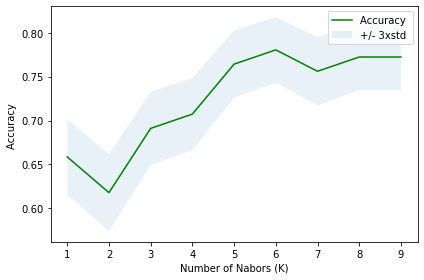

In [64]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

## F1 Score 

In [67]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7466561762391817

## LogLoss

In [68]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5536525604694796

## Jacard Index

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

## LOGISTIC REGRESSION

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [70]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [72]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.36626021, 0.63373979],
       [0.29557292, 0.70442708],
       [0.30062033, 0.69937967],
       [0.35808465, 0.64191535],
       [0.30876156, 0.69123844],
       [0.42743357, 0.57256643],
       [0.32414021, 0.67585979],
       [0.61307949, 0.38692051],
       [0.36938052, 0.63061948],
       [0.43542459, 0.56457541],
       [0.36103997, 0.63896003],
       [0.361723  , 0.638277  ],
       [0.31073076, 0.68926924],
       [0.30736288, 0.69263712],
       [0.69054283, 0.30945717],
       [0.31269073, 0.68730927],
       [0.36414723, 0.63585277],
       [0.35333803, 0.64666197],
       [0.35793523, 0.64206477],
       [0.3478886 , 0.6521114 ],
       [0.69852164, 0.30147836],
       [0.3188897 , 0.6811103 ],
       [0.28750335, 0.71249665],
       [0.31240149, 0.68759851],
       [0.68473327, 0.31526673],
       [0.31717241, 0.68282759],
       [0.36246337, 0.63753663],
       [0.3632572 , 0.6367428 ],
       [0.34363889, 0.65636111],
       [0.31984713, 0.68015287],
       [0.

In [73]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8044806517311609
Test set Accuracy:  0.7967479674796748


## F1 Score

In [74]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7755312289498615

## LogLoss

In [75]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5536525604694796

## Jacard Index

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

## SUPPORT VECTOR MACHINE

In [76]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [77]:
yhat = clf.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [78]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8044806517311609
Test set Accuracy:  0.7886178861788617


## F1 Score

In [79]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7682727283093307

## LogLoss

In [80]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5536525604694796

## Jacard Index

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

## DECISION TREE MODELLING

In [81]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [82]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [83]:
predTree = drugTree.predict(X_test)
print (predTree)
print (y_test)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 0 0 0 1]
[1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 0 1 1 0 1 1 1 1 0 1 0 0]


In [84]:
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7723577235772358


## LogLoss

In [85]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5536525604694796

## F1 Score

In [86]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7682727283093307

## Jacard Index

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)